In [22]:
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np

In [9]:
mnist= tf.keras.datasets.mnist

(x_train, y_train) , (x_test,y_test) = mnist.load_data()

In [10]:
x_train.shape

(60000, 28, 28)

In [11]:
x_test.shape

(10000, 28, 28)

In [12]:
print(x_train[4])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0  55 148 210 253 253 113
   87 148  55   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  87 232 252 253 18

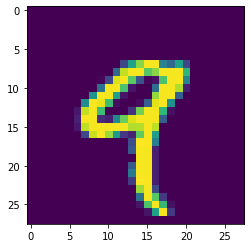

In [13]:
plt.imshow(x_train[4])
plt.show()

## Normalizing the data

In [14]:
x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)

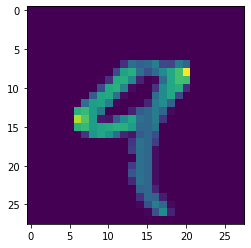

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [15]:
plt.imshow(x_train[4])
plt.show()
print(x_train[4])

## Model Building and Training

In [18]:
model = tf.keras.models.Sequential()

# Input Layer
model.add(tf.keras.layers.Flatten())

# 2 hidden layers
model.add(tf.keras.layers.Dense(128,activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128,activation=tf.nn.relu))

#Output layer
model.add(tf.keras.layers.Dense(10,activation=tf.nn.softmax))

model.compile(optimizer=tf.compat.v1.train.AdamOptimizer(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train,y_train,epochs=10)

Epoch 1/10
60000/60000 [==============================] - 12s 193us/sample - loss: 0.2648 - acc: 0.9235
Epoch 2/10
60000/60000 [==============================] - 11s 189us/sample - loss: 0.1067 - acc: 0.9676
Epoch 3/10
60000/60000 [==============================] - 11s 183us/sample - loss: 0.0732 - acc: 0.9769
Epoch 4/10
60000/60000 [==============================] - 11s 188us/sample - loss: 0.0533 - acc: 0.9829
Epoch 5/10
60000/60000 [==============================] - 12s 192us/sample - loss: 0.0408 - acc: 0.9868
Epoch 6/10
60000/60000 [==============================] - 12s 193us/sample - loss: 0.0313 - acc: 0.9897
Epoch 7/10
60000/60000 [==============================] - 12s 192us/sample - loss: 0.0254 - acc: 0.9916
Epoch 8/10
60000/60000 [==============================] - 12s 205us/sample - loss: 0.0198 - acc: 0.9933
Epoch 9/10
60000/60000 [==============================] - 13s 213us/sample - loss: 0.0187 - acc: 0.9935
Epoch 10/10
60000/60000 [==============================] - 13s 2

## Model Evaluation and Predictions

In [19]:
val_loss, val_accuracy= model.evaluate(x_test,y_test)

10000/10000 [==============================] - 3s 274us/sample - loss: 0.1274 - acc: 0.9735s - loss:


In [20]:
predictions = model.predict(x_test)

In [21]:
print(predictions)

[[1.6078270e-16 3.7687564e-13 1.3497377e-10 ... 1.0000000e+00
  6.7506662e-15 5.7981580e-14]
 [6.8610194e-18 7.7351146e-12 1.0000000e+00 ... 5.2033660e-18
  4.8259194e-15 1.4846960e-23]
 [3.5090271e-14 9.9999583e-01 1.0786184e-06 ... 4.6923594e-07
  2.6781083e-06 2.1231874e-14]
 ...
 [1.9948063e-17 3.3174755e-10 6.6940385e-17 ... 2.5933751e-09
  1.4423387e-12 3.1553953e-09]
 [4.6363900e-14 1.1079478e-13 1.9787846e-13 ... 1.0683715e-11
  1.2982145e-08 1.9165412e-19]
 [2.3058422e-10 9.7902384e-18 4.4770392e-16 ... 3.8939825e-22
  2.6558690e-12 2.6933826e-17]]


In [24]:
np.argmax(predictions[3])

0

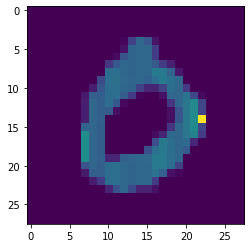

In [25]:
plt.imshow(x_test[3])
plt.show()

In [26]:
np.argmax(predictions[100])

6

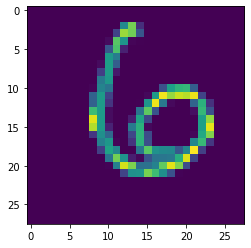

In [27]:
plt.imshow(x_test[100])
plt.show()